In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-air-quality/airquality.csv
/kaggle/input/data-science-salaries-2023/ds_salaries.csv
/kaggle/input/echocardiogram/echocardiogram.data


### 1 Hands On: Data Import and Manipulation

# 1. Introduction to Python for Machine Learning
## a) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array

In [2]:
random_numbers=np.random.randint(low=1,high=101,size=10)
print(random_numbers)
print(type(random_numbers))
mean=random_numbers.mean()
desviation=random_numbers.std()
print(mean)
print(desviation)

[84 58 41 86  5 92 27 71 89 56]
<class 'numpy.ndarray'>
60.9
27.79370432310166


## b) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column.


In [3]:
random_numbers=np.random.randint(low=1,high=101,size=12)
matrix=random_numbers.reshape(3,4)
result=matrix.sum()
print("Matriz",matrix)
print("Suma matriz",result)

Matriz [[34 68 81 86]
 [13 17  2 89]
 [39 18 63 14]]
Suma matriz 524


## c) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30

In [4]:
data = {
    'Name':["Jhon","Jeff","Maria","Pedro","Jose"],
    'Age':[24,35,26,33,24],
    'City':["A","B","C","D","E"]
}
df=pd.DataFrame.from_dict(data)
print(df)
df = df[df['Age']>=30]
print("filtered df")
print(df)

    Name  Age City
0   Jhon   24    A
1   Jeff   35    B
2  Maria   26    C
3  Pedro   33    D
4   Jose   24    E
filtered df
    Name  Age City
1   Jeff   35    B
3  Pedro   33    D


## d) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame

In [5]:
dataframe = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
mean_work_year=dataframe['work_year'].mean()
median_work_year=dataframe['work_year'].median()
mode_work_year=dataframe['work_year'].mode()
print("mean work_year:",mean_work_year)
print("median work_year:",median_work_year)
print("mode work_year:",mode_work_year)


mean work_year: 2022.3736351531293
median work_year: 2022.0
mode work_year: 0    2023
Name: work_year, dtype: int64


## e) Create a scatter plot of random x and y values between 1 and 100.

[96 72 11 62  2 48 24 50 55 70]


[]

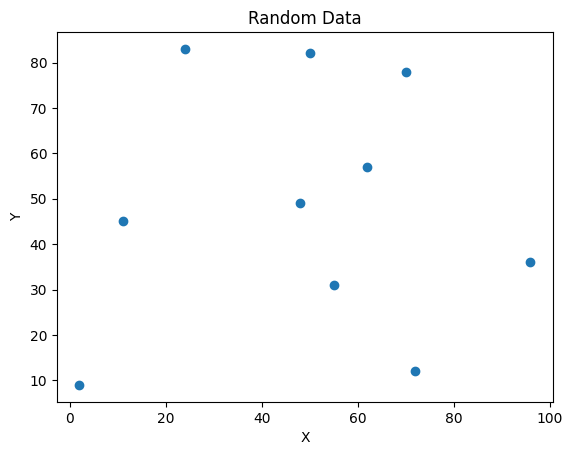

In [6]:
import matplotlib.pyplot as plt
random_numbers=np.random.randint(low=1,high=101,size=20).reshape(2,10)
print(random_numbers[0])
plt.scatter(random_numbers[0],random_numbers[1])
plt.title('Random Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.plot()

## f) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.

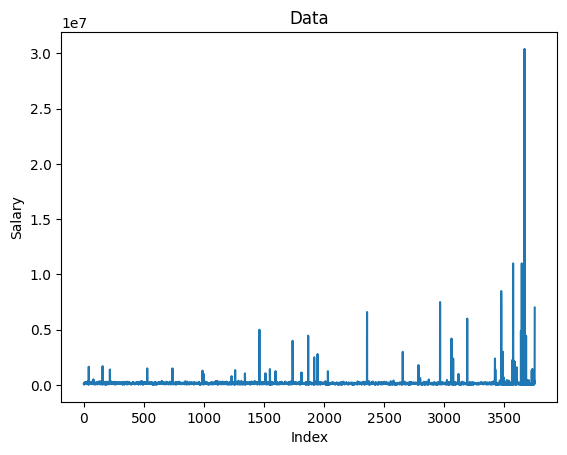

In [7]:
dataframe = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
#print(dataframe['salary'])
plt.title('Data')
plt.xlabel('Index')
plt.ylabel('Salary')
plt.plot(dataframe['salary'])

## 3. Data Import
The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of
patients that suffered heart attacks at some point in the past.

### (a) Download the Echocardiogram data set and import it to a data frame. Read the information on the data set and find out how missing values are represented and make sure that they are properly represented.

In [95]:
# Specify the path to the .data file
file_path = "/kaggle/input/echocardiogram/echocardiogram.data"

# Load the .data file into a DataFrame
df = pd.read_csv(file_path, header=None)

missing_count = (df == "?").sum().sum()

print("Number of missing values represented as '?':", missing_count)


Number of missing values represented as '?': 132


### (b) Assign the attributes with meaningful names. You can look for this information on the same webpage.


In [96]:
column_names=["survival","still_alive" ,"age_at_heart_attack" ,"pericardial_effusion" ,"fractional_shortening" ,"epss","lvdd","wall_motion_score","wall_motion_index","mult","name","group","alive_at_1"]
df.columns = column_names
print(df)

    survival still_alive age_at_heart_attack pericardial_effusion  \
0         11           0                  71                    0   
1         19           0                  72                    0   
2         16           0                  55                    0   
3         57           0                  60                    0   
4         19           1                  57                    0   
..       ...         ...                 ...                  ...   
127      7.5           1                  64                    0   
128       41           0                  64                    0   
129       36           0                  69                    0   
130       22           0                  57                    0   
131       20           0                  62                    0   

    fractional_shortening    epss   lvdd wall_motion_score wall_motion_index  \
0                   0.260       9  4.600                14                 1   
1          

### (c) According to that same information, is there any redundant or irrelevant attribute that you can remove? Remove them.

In [115]:
new_df=df.copy()
print(new_df)
# Delete rows where still_alive column is 0 or contains "?"
new_df = new_df[(new_df['still_alive'] != 0) & (new_df['still_alive'] != "?")]

# Delete the "wall_motion" column from the dataset is the same than wall-motion-index it can be redundant
# Delete the "name" column from the dataset because has the same value in all rows
# Delete the "mult" column from the dataset beacuse can be ignored
# Delete the "group" column from the dataset becase is insignificant
# Delete specified columns

columns_to_delete = ['wall_motion_score', 'name', 'mult', 'group']
new_df = new_df.drop(columns=columns_to_delete)

# Print the updated DataFrame
print(new_df)

    survival still_alive age_at_heart_attack pericardial_effusion  \
0         11           0                  71                    0   
1         19           0                  72                    0   
2         16           0                  55                    0   
3         57           0                  60                    0   
4         19           1                  57                    0   
..       ...         ...                 ...                  ...   
127      7.5           1                  64                    0   
128       41           0                  64                    0   
129       36           0                  69                    0   
130       22           0                  57                    0   
131       20           0                  62                    0   

    fractional_shortening    epss   lvdd wall_motion_score wall_motion_index  \
0                   0.260       9  4.600                14                 1   
1          

### (d) Is there any data type change that you find useful? Perform it.

In [116]:
# List of columns to convert to numeric, excluding 'alive_at_1'
columns_to_convert = [col for col in new_df.columns if col != 'alive_at_1']

# Convert columns to numeric
for col in columns_to_convert:
    new_df[col] =pd.to_numeric(new_df[col], errors='coerce')
    
# Replace NaN values with column medians
new_df = new_df.fillna(new_df.median(numeric_only=True))
print("before head",new_df.head(30))
print("before tail",new_df.tail(30))
# Fix rows where alive_at_1 contains "?" based in survival and still_alive
# Define the lambda function to calculate the new values
def calculate_alive_at_1(row):
    if row['alive_at_1'] != '?':
        return row['alive_at_1']
    else:
        if row['survival'] > 12 and row['still_alive'] == 1:
            return 1
        else:
            return 0
    
# Apply the lambda function to the 'alive_at_1' column
new_df['alive_at_1'] = new_df.apply(lambda row: calculate_alive_at_1(row), axis=1)
# Print the updated DataFrame
print("after head",new_df.head(30))
print("after tail",new_df.tail(30))

columns to convert ['survival', 'still_alive', 'age_at_heart_attack', 'pericardial_effusion', 'fractional_shortening', 'epss', 'lvdd', 'wall_motion_index']
before head     survival  still_alive  age_at_heart_attack  pericardial_effusion  \
0      11.00            0               71.000                     0   
1      19.00            0               72.000                     0   
2      16.00            0               55.000                     0   
3      57.00            0               60.000                     0   
4      19.00            1               57.000                     0   
5      26.00            0               68.000                     0   
6      13.00            0               62.000                     0   
7      50.00            0               60.000                     0   
8      19.00            0               46.000                     0   
9      25.00            0               54.000                     0   
10     10.00            1               

## 4. Data Manipulation
Load the airquality data set regarding a set of New York Air Quality Measurements.

In [118]:
# Read the dataframe from a file
df = pd.read_csv('/kaggle/input/new-york-air-quality/airquality.csv')

# Display the dataframe
print(df)

     Ozone  Solar.R  Wind  Temp  Month  Day
0     41.0    190.0   7.4    67      5    1
1     36.0    118.0   8.0    72      5    2
2     12.0    149.0  12.6    74      5    3
3     18.0    313.0  11.5    62      5    4
4      NaN      NaN  14.3    56      5    5
..     ...      ...   ...   ...    ...  ...
148   30.0    193.0   6.9    70      9   26
149    NaN    145.0  13.2    77      9   27
150   14.0    191.0  14.3    75      9   28
151   18.0    131.0   8.0    76      9   29
152   20.0    223.0  11.5    68      9   30

[153 rows x 6 columns]


### (n) For which attributes are there missing values?

In [119]:
# Check for missing values in each attribute
missing_values = df.isnull().sum()

# Display the missing values count
print(missing_values)

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64


### (o) Do all the attributes are in the most suitable data type? Make the changes you find necessary.

In [121]:
# Check the data types of the attributes
data_types = df.dtypes

# Display the data types
print(data_types)
# Replace NAs with the mean of each column, excluding non-numeric values
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric
numeric_columns = df.select_dtypes(include=np.number).columns  # Get numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())  # Replace NAs with mean

# Print the updated dataframe
print(df)

Ozone      float64
Solar.R    float64
Wind       float64
Temp         int64
Month        int64
Day          int64
dtype: object
        Ozone     Solar.R  Wind  Temp  Month  Day
0    41.00000  190.000000   7.4    67      5    1
1    36.00000  118.000000   8.0    72      5    2
2    12.00000  149.000000  12.6    74      5    3
3    18.00000  313.000000  11.5    62      5    4
4    42.12931  185.931507  14.3    56      5    5
..        ...         ...   ...   ...    ...  ...
148  30.00000  193.000000   6.9    70      9   26
149  42.12931  145.000000  13.2    77      9   27
150  14.00000  191.000000  14.3    75      9   28
151  18.00000  131.000000   8.0    76      9   29
152  20.00000  223.000000  11.5    68      9   30

[153 rows x 6 columns]


### (p) What period of the year do these records refer to?

In [124]:
# Calculate the minimum and maximum values of the "month" column
min_month = df['Month'].min()
max_month = df['Month'].max()

# Print the minimum and maximum values
print("Period: from month", min_month,"to: ",max_month)

Period: from month 5 to:  9


### (q) Load the package dplyr and save the data set in a table data frame format.

In [ ]:
# this not necessary in python

### (r) Select the days in May with a temperature above 70 Fahrenheit.

In [125]:
# Select days in May with temperature above 70 Fahrenheit
may_above_70 = df[(df['Month'] == 5) & (df['Temp'] > 70)]
# Print the resulting dataframe
print(may_above_70)

    Ozone     Solar.R  Wind  Temp  Month  Day
1    36.0  118.000000   8.0    72      5    2
2    12.0  149.000000  12.6    74      5    3
10    7.0  185.931507   6.9    74      5   11
21   11.0  320.000000  16.6    73      5   22
28   45.0  252.000000  14.9    81      5   29
29  115.0  223.000000   5.7    79      5   30
30   37.0  279.000000   7.4    76      5   31


### (s) Create a new attribute TempC which represents the temperature values in Celsius.

In [126]:
# Convert Fahrenheit to Celsius
df['TempC'] = (df['Temp'] - 32) * 5/9

# Print the updated dataframe
print(df)

        Ozone     Solar.R  Wind  Temp  Month  Day      TempC
0    41.00000  190.000000   7.4    67      5    1  19.444444
1    36.00000  118.000000   8.0    72      5    2  22.222222
2    12.00000  149.000000  12.6    74      5    3  23.333333
3    18.00000  313.000000  11.5    62      5    4  16.666667
4    42.12931  185.931507  14.3    56      5    5  13.333333
..        ...         ...   ...   ...    ...  ...        ...
148  30.00000  193.000000   6.9    70      9   26  21.111111
149  42.12931  145.000000  13.2    77      9   27  25.000000
150  14.00000  191.000000  14.3    75      9   28  23.888889
151  18.00000  131.000000   8.0    76      9   29  24.444444
152  20.00000  223.000000  11.5    68      9   30  20.000000

[153 rows x 7 columns]


In [127]:
# Sort the dataframe by 'TempC' column in descending order
sorted_df = df.sort_values('TempC', ascending=False)

# Get the top 30 rows (hottest days)
hottest_days = sorted_df.head(30)

# Print the hottest days
print(hottest_days)

         Ozone     Solar.R  Wind  Temp  Month  Day      TempC
119   76.00000  203.000000   9.7    97      8   28  36.111111
121   84.00000  237.000000   6.3    96      8   30  35.555556
122   85.00000  188.000000   6.3    94      8   31  34.444444
120  118.00000  225.000000   2.3    94      8   29  34.444444
41    42.12931  259.000000  10.9    93      6   11  33.888889
126   91.00000  189.000000   4.6    93      9    4  33.888889
125   73.00000  183.000000   2.8    93      9    3  33.888889
124   78.00000  197.000000   5.1    92      9    2  33.333333
42    42.12931  250.000000   9.2    92      6   12  33.333333
101   42.12931  222.000000   8.6    92      8   10  33.333333
68    97.00000  267.000000   6.3    92      7    8  33.333333
69    97.00000  272.000000   5.7    92      7    9  33.333333
74    42.12931  291.000000  14.9    91      7   14  32.777778
123   96.00000  167.000000   6.9    91      9    1  32.777778
39    71.00000  291.000000  13.8    90      6    9  32.222222
100  110

### (u) Inspect which were the hottest days, but also with the highest ozone values.

In [131]:
# Sort the sorted DataFrame by 'TempC' and 'Ozone' column in descending order
df_sorted = df.sort_values(by=['TempC', 'Ozone'], ascending=[False, False])

# Print the sorted DataFrame
print(df_sorted)

         Ozone     Solar.R  Wind  Temp  Month  Day      TempC
119   76.00000  203.000000   9.7    97      8   28  36.111111
121   84.00000  237.000000   6.3    96      8   30  35.555556
120  118.00000  225.000000   2.3    94      8   29  34.444444
122   85.00000  188.000000   6.3    94      8   31  34.444444
126   91.00000  189.000000   4.6    93      9    4  33.888889
..         ...         ...   ...   ...    ...  ...        ...
14    18.00000   65.000000  13.2    58      5   15  14.444444
24    42.12931   66.000000  16.6    57      5   25  13.888889
26    42.12931  185.931507   8.0    57      5   27  13.888889
17     6.00000   78.000000  18.4    57      5   18  13.888889
4     42.12931  185.931507  14.3    56      5    5  13.333333

[153 rows x 7 columns]


### (v) Inspect the number of days for which there was a register for each month.

In [132]:
# Group the dataset by month and count the number of days
grouped = df.groupby('Month')['Day'].count()

# Print the grouped data
print(grouped)

Month
5    31
6    30
7    31
8    31
9    30
Name: Day, dtype: int64


### (w) For each month, obtain the minimum and the maximum temperature registered in Celsius.

In [133]:
# Group the dataset by month and calculate minimum and maximum temperature
grouped = df.groupby('Month')['Temp'].agg(['min', 'max'])

# Print the grouped data
print(grouped)

       min  max
Month          
5       56   81
6       65   93
7       73   92
8       72   97
9       63   93


### (x) Obtain the average of the following parameters by month: temperature in celsius, wind, solar radiation and ozone.

In [135]:
# Group the dataset by month and calculate the average of the parameters
grouped = df.groupby('Month').agg({
    'TempC': 'mean',
    'Wind': 'mean',
    'Solar.R': 'mean',
    'Ozone': 'mean'
})

# Print the grouped data
print(grouped)

           TempC       Wind     Solar.R      Ozone
Month                                             
5      18.637993  11.622581  181.894388  26.601502
6      26.166667  10.266667  190.166667  38.323851
7      28.835125   8.941935  216.483871  56.375695
8      28.870968   8.793548  173.219178  57.085373
9      24.944444  10.180000  167.433333  31.804310


### (y) What values did you obtain regarding ozone and solar radiation attributes? Why? Make the necessary change so that you get the average of the registered values.

I did't have any problems because i fixed NAs in preprocessing :)